<a href="https://colab.research.google.com/github/Neamalinga/univariate-analysis/blob/main/univariate_analysis_for_bank_market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing data
data=pd.read_csv(r"/content/drive/MyDrive/DATA SETS/data-20251106T090548Z-1-001/data/bank_market.csv")

In [ ]:
data.head()

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.dtypes

,0
Cust_num,int64
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object


In [ ]:
#converting all the object datatypes to categorical datatypes
data=data.astype({col:"category"for col in
  data.select_dtypes(include="object").columns })

In [ ]:
#univariate analysis
numerical_cols=data.select_dtypes(include=["int64","Int64","float64"])

In [ ]:
list(numerical_cols)

['Cust_num',
 'age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [ ]:
#segregating variables into groups
customer_details=["Cust_num","age"]
customer_financial=['balance']
customer_interaction=['duration', 'campaign','pdays','previous']

In [ ]:
len(customer_interaction)

4

In [ ]:
from logging import StreamHandler
import matplotlib.pyplot as plt
import seaborn as sns
#defining a function
def univariate_analysis(data,var_grp):
  size=len(var_grp)
  plt.figure(figsize=(7*size,3))

  #looping
  for j,i in enumerate(var_grp):
    plt.subplot(1,size,j+1)
    #caluculating the descriptives
    min_val=data[i].min() # Renamed min to min_val to avoid conflict with built-in min()
    max_val=data[i].max() # Renamed max to max_val to avoid conflict with built-in max()
    data_range=data[i].max()-data[i].min() # Renamed range to data_range
    mean=data[i].mean()
    median=data[i].median()
    std_dev=data[i].std()
    skew=data[i].skew()
    kurt=data[i].kurt()
    #points
    points=(mean-std_dev,mean+std_dev) # Corrected stdev to std_dev
    # plotting
    sns.kdeplot(data[i],shade=True)
    sns.lineplot(x=points,y=[0,0],color="red",label="std_dev")
    sns.scatterplot(x=[mean],y=[0],color="blue",label="mean")
    sns.scatterplot(x=[median],y=[0],color="green",label="median")
    sns.scatterplot(x=[min_val,max_val],y=[0,0],color="orange",label="min/max")
    plt.xlabel("{}".format(i),fontsize=25)
    plt.ylabel("density",fontsize=25)
    plt.title(f"Std_Dev={std_dev:.2f}, Kurtosis={kurt:.2f}\nSkew={skew:.2f}, Range={data_range:.2f}\nMean={mean:.2f}, Median={median:.2f}")
  plt.tight_layout()
  plt.show()

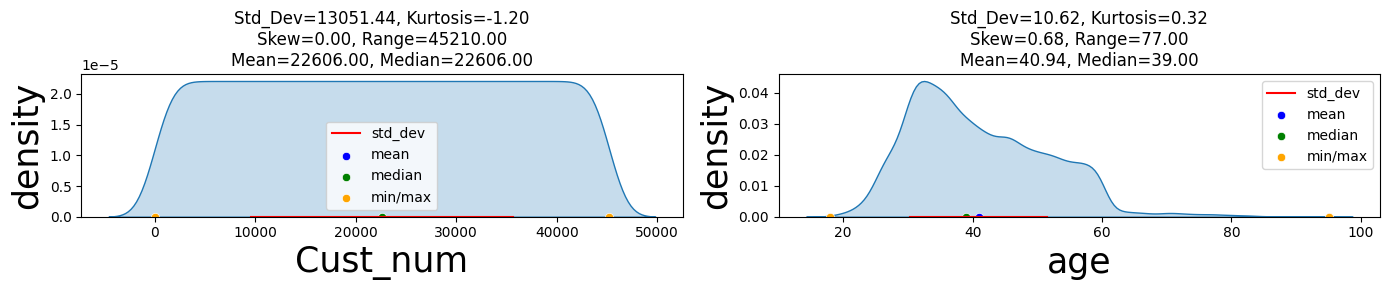

In [ ]:
univariate_analysis(data,customer_details)

INTERPRETATION
CUST_NUM:
IT SHOWS UNIFORM DISRTIBUTION
IT JUST ACTS AS AN INDEX/EACH RECOREESPONDS TO A DISTINCTCUSTOMER
SKEWNESS AND KURTOSIS ARE CLOSE TO ZERO WHICH SHOWS UNIFORM DISRIBUTION
AGE:


INTERPRETATION OF AGE:
KURTOSIS=0.32 Which is almost near to zero so there will be less chance of an outlier
skewness=0.68 which postive/right skewed which there are more no of youngcustomers
fewer old customers
range =77 which means there is diff of 77years bteween old and young age customers
distribution is slightly right skewed


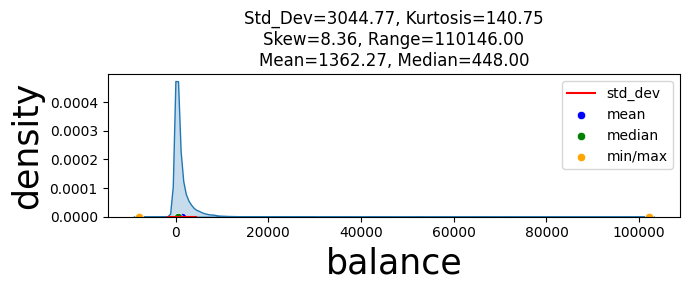

In [ ]:
univariate_analysis(data,customer_financial)

As Kurtosis is far more than since there is a possibility of outlier
as skewness far away from the zero so the distribution is extremely right skewed
#it show most of the customers have low balance
mean=1362.27
median =448
this indicates few customers who are having high balances are pulling the avg to high as median is only 448
range=110146  which indicate a huge gap btw min and  max


In [ ]:
#removing the outlier
m_balance=data["balance"]

In [ ]:
balance_series = data['balance'] # Start with the original balance series
factor = 3

# Create a boolean mask to identify non-outliers
non_outlier_mask = (balance_series - balance_series.mean()).abs() < factor * balance_series.std()

# Use the mask to filter the balance series, effectively removing outliers
m_balance = balance_series[non_outlier_mask]

print(f"Original length of data: {len(data)}")
print(f"Length of m_balance after outlier removal: {len(m_balance)}")

Original length of data: 45211
Length of m_balance after outlier removal: 44466


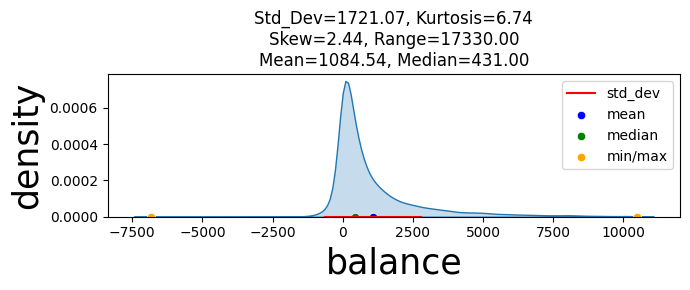

In [ ]:
# Create a temporary DataFrame from m_balance for univariate analysis
temp_balance_df = pd.DataFrame({'balance': m_balance})
univariate_analysis(temp_balance_df, customer_financial)

In [ ]:
#interpretation: even after the transformation skewness and kurtosis is far away from the zero so the distribution is not normal


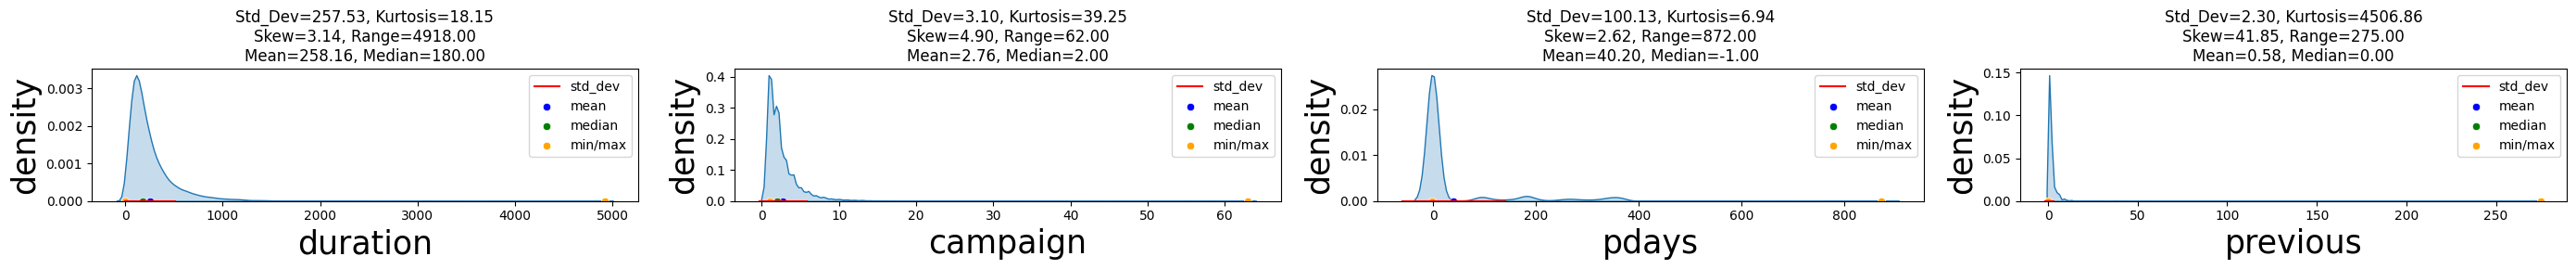

In [ ]:
univariate_analysis(data,customer_interaction)

duration:the distribution is right skewed so the duration of contact of the most of the customers are very low

campaign:this is also right skewed which means the no of customer who has been contacted are very less.



entire the distribution is not normal


In [ ]:
#outlier removal
modified_data=data[customer_interaction]

In [ ]:
for col in customer_interaction:
    mean = modified_data[col].mean()
    std = modified_data[col].std()
    modified_data = modified_data[modified_data[col] < (mean + 3 * std)]

print("Outliers removed from customer interaction columns.")
print(f"New shape of modified_data: {modified_data.shape}")

Outliers removed from customer interaction columns.
New shape of modified_data: (41408, 4)


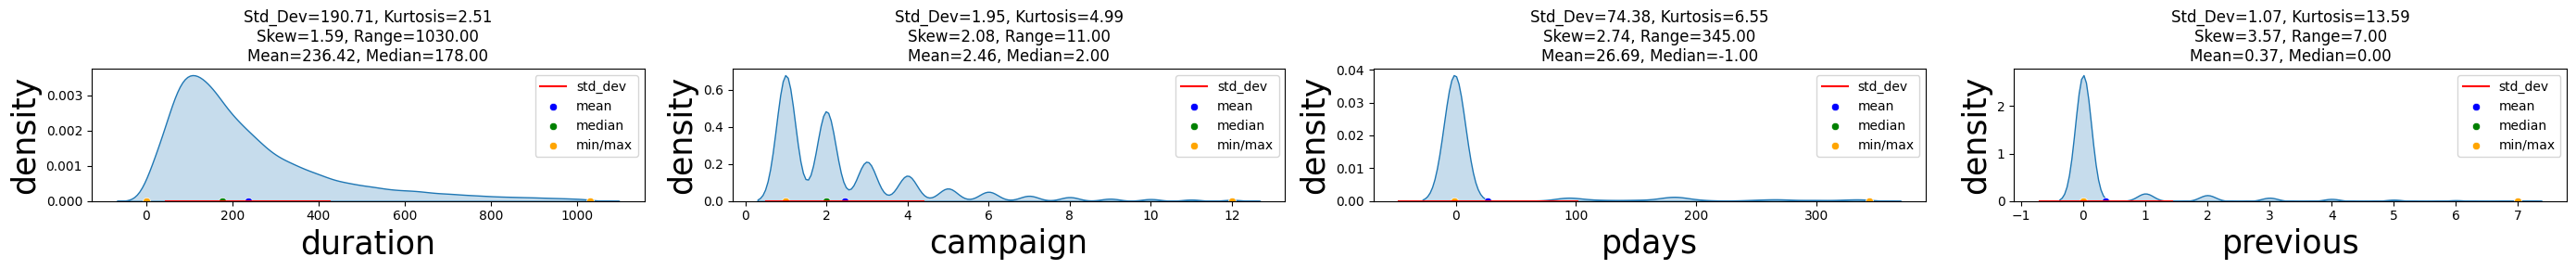

In [ ]:
univariate_analysis(modified_data,customer_interaction)


In [ ]:
#distribution is not normal even after oulier removal